## Data Science Challenge

﻿The data given is of credit records of individuals with certain attributes. Please go through following to understand the variables involved:
1. **serial number :** unique identification key

2. **account_info :** Categorized details of existing accounts of the individuals. The balance of money in account provided is stated by this variable

3. **purpose:** This variable signifies why the loan was taken
    - A40 signifies that the loan is taken to buy a new car
    - A46 signifies that the loan is taken for education
    - A47 signifies that the loan is taken for vacation
    - A48 signifies that the loan is taken for re skilling
    - A49 signifies that the loan is taken for business and establishment
    - A410 signifies other purposes

4. **savings_account:** This variable signifies details of the amount present in savings account of the individual:
    - A61 signifies that less than 100 units (excluding 100) of currency is present
    - A62 signifies that greater than 100 units (including 100) and less than 500 (excluding 500) units of currency is present
    - A63 signifies that greater than 500 (including 500) and less than 1000 (excluding 1000) units of currency is present.
    - A64 signifies that greater than 1000 (including 1000) units of currency is present.
    - A65 signifies that no savings account details is present on record

5. **employment_st:** Catergorical variable that signifies the employment status of everyone who has been alloted loans
    - A71 signifies that the individual is unemployed
    - A72 signifies that the individual has been employed for less than a year
    - A73 signifies that the individual has been employed for more than a year but less than four years
    - A74 signifies that the individual has been employed more than four years but less than seven years
    - A75 signifies that the individual has been employed for more than seven years

6. **gurantors:** Categorical variable which signifies if any other individual is involved with an individual loan case
    - A101 signifies that only a single individual is involved in the loan application
    - A102 signifies that one or more co-applicant is present in the loan application
    - A103 signifies that guarantor are present.

7. **resident_since:** Numerical variable that signifies for how many years the applicant has been a resident

8. **property_type:** This qualitative variable defines the property holding information of the individual
    - A121 signifies that the individual holds real estate property
    - A122 signifies that the individual holds a building society savings agreement or life insurance
    - A123 signifies that the individual holds cars or other properties
    - A124 signifies that property information is not available

9. **age:** Numerical variable that signifies age in number of years

10. **installment_type:** This variable signifies other installment types taken
    - A141 signifies installment to bank
    - A142 signifies installment to outlets or stores
    - A143 signifies that no information is present

11. **housing_type:** This is a categorical variable that signifies which type of housing does a applicant have.
    - A151 signifies that the housing is on rent
    - A152 signifies that the housing is owned by the applicant
    - A153 signifies that no loan amount is present on the housing and there is no expense for the housing)

12. **credits_no:** Numerical variable for number of credits taken by the person

13. **job_type:** Signifies the employment status of the person
    - A171 signifies that the individual is unemployed or unskilled and is a non-resident
    - A172 signifies that the individual is unskilled but is a resident
    - A173 signifies that the individual is a skilled employee or official
    - A174 signifies that the individual is involved in management or is self-employed or a
        highly qualified employee or officer

14. **liables:** Signifies number of persons dependent on the applicant

15. **telephone:** Signifies if the individual has a telephone or not
    - A191 signifies that no telephonic records are present
    - A192 signifies that a telephone is registered with the customer’s name

16. **foreigner:** Signifies if the individual is a foreigner or not (considering the country of residence of the bank)
    - A201 signifies that the individual is a foreigner
    - A202 signifies that the individual is a resident

**Objective of the problem:** The objective of the problem is to predict the values of credit_amount variable as per serial number variable. Please view the sample submissions file for better understanding. The solution must be presented in the form of a csv with predicted values of the response variable credit_amount along with it’s corresponding serial number.

**Evaluation Metric :** Normalized root mean squared error. The score is calculated by (1-rmse/normalization factor)*100.
**Submission Limit:** . Please note that individual submission limits 15

The objective of the problem is to predict the values of credit_amount variable as per serial number variable. Please view the sample submissions file for better understanding. The solution must be presented in the form of a csv with predicted values of the response variable credit_amount along with it’s corresponding serial number.

**Evaluation Algorithm**
**Root Mean Square Error (RMSE**)
normalization_constant 100000
Datasets
Training	download train.csv
Testing	download test.csv
Sample Submission	download sample.csv

# Importing required libraries and setup some variables

In [921]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import pylab as plt # help to plot different graphs 

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
#test.csv
#train.csv
#submission.csv

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


# Until fuction: line seperator
def print_dashes_and_ln():
    print('-'*100, '\n')
    
# Formatter to display all float format in 2 decimal format
#pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

### Reading training data with showing first 5 records

In [922]:
df_train = pd.read_csv('train.csv')
df_train_copy = df_train.copy()
df_train_copy.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,...,4,A124,53,A143,A153,2,A173,2,A191,A201


### Fetching last 5 records from training data

In [923]:
df_train.tail()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
695,696,NaN,6,YES,YES,A40,1236,A63,709.0,A73,...,4,A122,50,A143,A151,1,A173,1,A191,A201
696,697,SILVER,12,YES,YES,A40,1103,A61,36.0,A74,...,3,A121,29,A143,A152,2,A173,1,A191,A202
697,698,NaN,12,YES,NO,A40,926,A61,86.0,A71,...,2,A122,38,A143,A152,1,A171,1,A191,A201
698,699,NaN,18,YES,NO,A40,1800,A61,9.0,A73,...,2,A123,24,A143,A152,2,A173,1,A191,A201
699,700,GOLD,15,YES,YES,A46,1905,A61,38.0,A75,...,4,A123,40,A143,A151,1,A174,1,A192,A201


### Checking datatypes of columns

In [924]:
df_train.dtypes

serial number         int64
account_info         object
duration_month        int64
Loan                 object
Regularity           object
Purpose              object
credit_amount         int64
savings_account      object
Saving Account      float64
employment_st        object
Salary                int64
investment          float64
Gender               object
Status               object
gurantors            object
resident_since        int64
property_type        object
age                   int64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
dtype: object

### Get some basic information of the DataFrame:

In [925]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

There are some of variables which have missing values for example account_info, Saving Account. Saving Account has too many missing values, whereas we might be able to infer values for Age and Embarked.

In [926]:
#Delete serial number because that is not need for serial number and telephone
del df_train['serial number']
del df_train['telephone']

In [927]:
# getting total number of rows and column in the dataframe
def shape_of_dataframe(df_train):
    print(f" Shape of the dataframe = {df_train.shape}"); print_dashes_and_ln();
    totalrows=df_train.shape[0]
    print(f" Total number of rows in the dataset =  {totalrows}"); print_dashes_and_ln();
shape_of_dataframe(df_train)

 Shape of the dataframe = (700, 23)
---------------------------------------------------------------------------------------------------- 

 Total number of rows in the dataset =  700
---------------------------------------------------------------------------------------------------- 



Let's plots some basic figure to get basic idea of data.

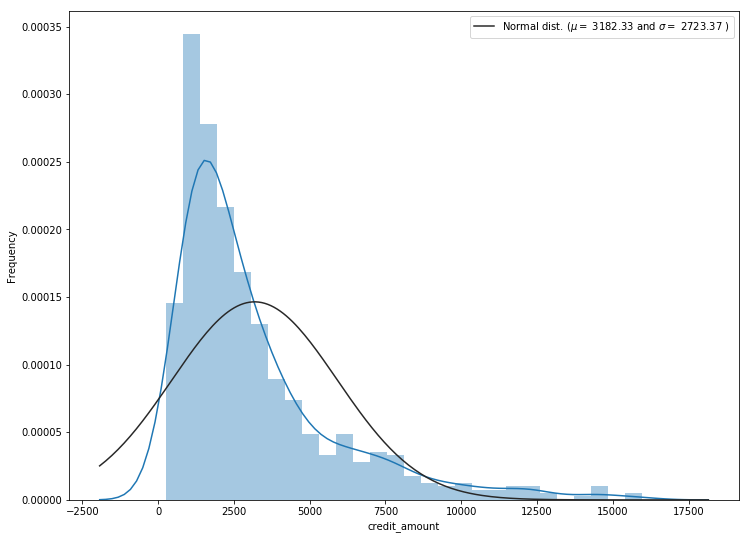

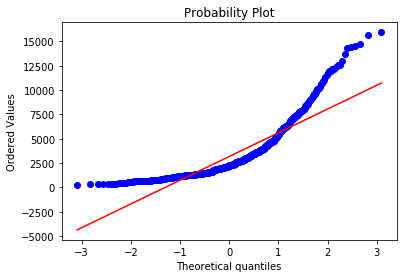

In [928]:
plt.subplots(figsize=(12,9))
sns.distplot(df_train['credit_amount'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['credit_amount'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['credit_amount'], plot=plt)
plt.show()

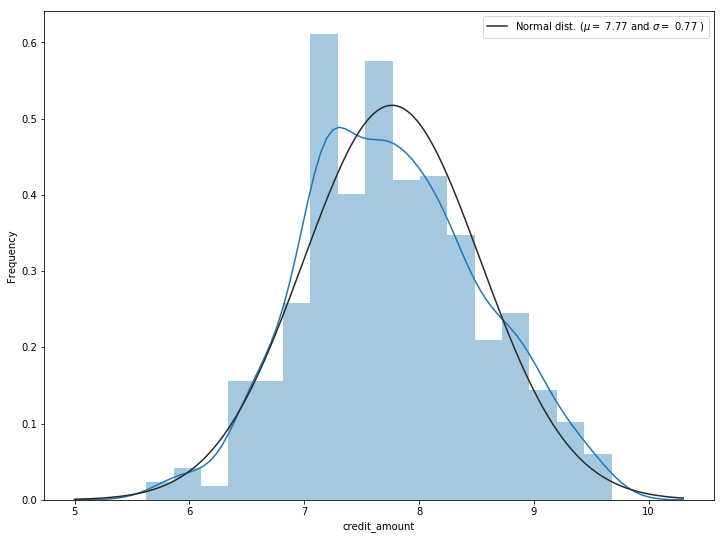

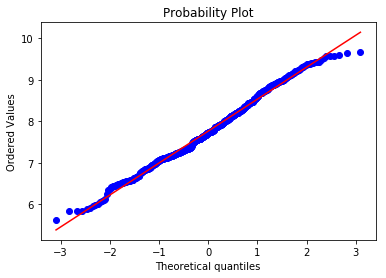

In [929]:
#we use log function which is in numpy
df_train['credit_amount'] = np.log1p(df_train['credit_amount'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(df_train['credit_amount'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_train['credit_amount'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_train['credit_amount'], plot=plt)
plt.show()



Check the missing values

In [930]:
#Let's check if the data set has any missing values. 
df_train.columns[df_train.isnull().any()]

Index(['account_info', 'Saving Account'], dtype='object')


Imputting missing values

In [931]:
df_train['account_info'] = df_train['account_info'].fillna('None')
df_train['Saving Account'] = df_train['Saving Account'].fillna(float(0))


#Let's check if the data set has any missing values. 

In [932]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [933]:
# Columns by Data Type
non_numeric_columns = df_train.select_dtypes(['object']).columns
numeric_columns = df_train.select_dtypes(['number']).columns
print(f" Non Numerical Columns of the dataframe = {non_numeric_columns}"); print_dashes_and_ln();
print(f" Numerical Columns of the dataframe = {numeric_columns}"); print_dashes_and_ln();

 Non Numerical Columns of the dataframe = Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'foreigner'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 

 Numerical Columns of the dataframe = Index(['duration_month', 'credit_amount', 'Saving Account', 'Salary',
       'investment', 'resident_since', 'age', 'credits_no', 'liables'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 



Now, there is no any missing values. Encoding str to int


In [934]:


cols = ('account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'foreigner')


In [935]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

In [936]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 23 columns):
account_info        700 non-null int64
duration_month      700 non-null int64
Loan                700 non-null int64
Regularity          700 non-null int64
Purpose             700 non-null int64
credit_amount       700 non-null float64
savings_account     700 non-null int64
Saving Account      700 non-null float64
employment_st       700 non-null int64
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null int64
Status              700 non-null int64
gurantors           700 non-null int64
resident_since      700 non-null int64
property_type       700 non-null int64
age                 700 non-null int64
installment_type    700 non-null int64
housing_type        700 non-null int64
credits_no          700 non-null int64
job_type            700 non-null int64
liables             700 non-null int64
foreigner           700 non-nul

Change data type from float to int 

In [937]:
df_train['Saving Account'] = df_train['Saving Account'].astype(int)

In [938]:
df_train['investment'] = df_train['investment'] * 10
df_train['investment'] = df_train['investment'].astype(int)

In [939]:
df_train[['credit_amount','investment']].head(50)

,credit_amount,investment
0,7.064759,340
1,8.691483,480
2,7.648263,415
3,8.972464,476
4,8.491055,526
5,9.111183,472
6,7.950150,470
7,8.846353,461
8,8.026170,378
9,8.563122,385


credit amount is our target value so 

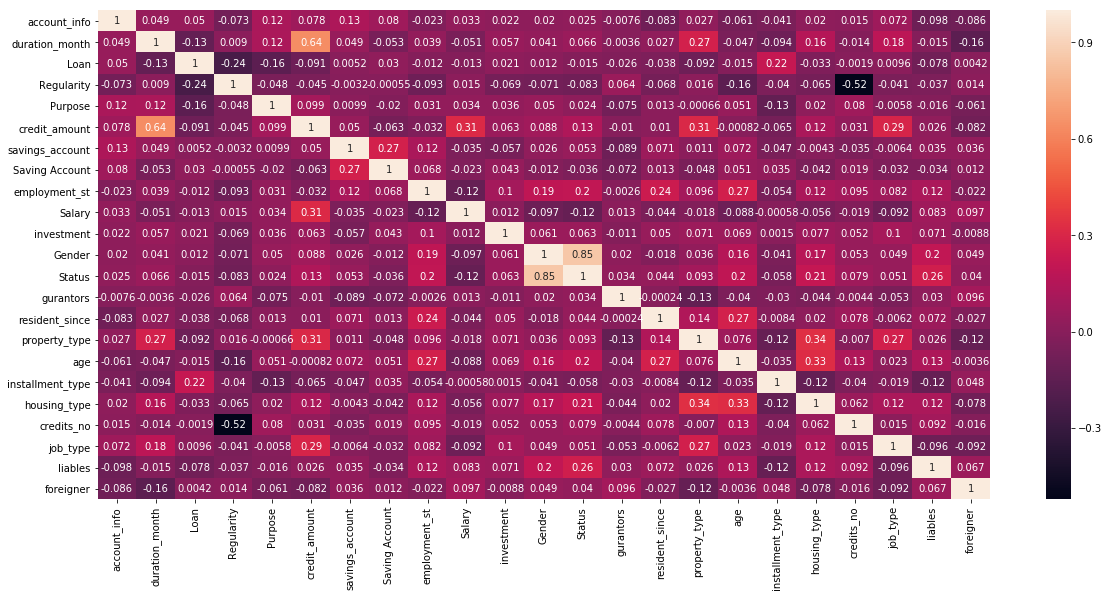

In [940]:


#Coralation plot
corr = df_train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)




Top 10% Corralation train attributes with credit amount

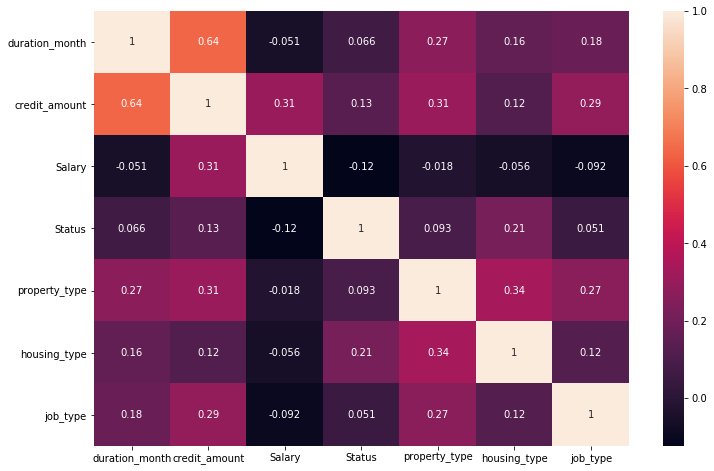

In [941]:


top_feature = corr.index[abs(corr['credit_amount']>0.1)]
plt.subplots(figsize=(12, 8))
top_corr = df_train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here duration_month is highly correlated with target feature of credit amount by 64%.
So, more duration month then more credit amount.


In [942]:
def clean_data(df, drop_serial_number):

    df['account_info'] = df['account_info'].fillna('None')
    df['Saving Account'] = df['Saving Account'].fillna(float(0))
    

    cols = ('account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
           'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
           'installment_type', 'housing_type', 'job_type', 'foreigner')
    
    #from sklearn.preprocessing import LabelEncoder
    for c in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
    
    df['Saving Account'] = df['Saving Account'].astype(int)
    df['investment'] = df['investment'] * 10
    df['investment'] = df['investment'].astype(int)
    

    # Drop the telephone column since it won't be used as a feature.
    df = df.drop(['telephone'], axis=1)

    if drop_serial_number:
        df = df.drop(['serial number'], axis=1)

    return df

In [943]:
df_train = clean_data(df_train_copy,drop_serial_number=True)
df_train['credit_amount'] = np.log1p(df_train['credit_amount'])



### Prepraring data for prediction

In [944]:
#Take targate variable into y
y = df_train['credit_amount']
#Delete the credit_amount
del df_train['credit_amount']

In [945]:
#Take their values in X and y
X = df_train.values
y = y.values

In [946]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Linear Regression

In [947]:
#Train the model
from sklearn import linear_model
model_linear_regression = linear_model.LinearRegression()

In [948]:
#Fit the model
model_linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [949]:
# #Prediction
print("Predict value " + str(model_linear_regression.predict([X_test[13]])))
print("Real value " + str(y_test[13]))


Predict value [7.60117096]
Real value 7.498315870766981


In [950]:
#Score/Accuracy
print("Accuracy for Linear Regression--> ", model_linear_regression.score(X_test, y_test)*100)

Accuracy for Linear Regression-->  56.79762225540674


### RandomForestRegression

In [951]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=10)

In [952]:
#Fit
model_random.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [953]:
#Score/Accuracy
print("Accuracy for RandomForestRegression--> ", model_random.score(X_test, y_test)*100)

Accuracy for RandomForestRegression-->  51.06012731451139


### GradientBoostingRegressor

In [954]:


#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)



In [955]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [956]:
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  54.67854669014424


# XGBOOST ALGO: PREPARE FOR SUBMISSION
Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:


In [957]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [958]:
df_test = pd.read_csv('test.csv')

In [959]:
df_test = clean_data(df_test,drop_serial_number=False)

In [960]:
test_data = df_test.values

In [961]:
data_dmatrix = xgb.DMatrix(data=df_test,label=y)

In [962]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [963]:
xg_reg.fit(X_train,y_train)

preds = model_linear_regression.predict(X_test)
#print("Accuracy --> ", xg_reg.score(X_test, y_test)*100)
#from sklearn.metrics import accuracy_score
#print ("Accuracy = %.2f" % (accuracy_score(y_test, preds)))

[22:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [964]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.472330


In [965]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


[22:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [966]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,6.628448,0.057789,6.627531,0.133284
1,5.983984,0.052511,5.982959,0.139057
2,5.404727,0.047808,5.403583,0.144270
3,4.884297,0.043628,4.883020,0.148967
4,4.416958,0.039924,4.415536,0.153184


In [967]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.826289
Name: test-rmse-mean, dtype: float64


In [968]:
#S.no
# Get the test data features, skipping the first column 'Serial Number'
test_x = test_data[:, 1:]

# Predict the credit amount values for the test data
test_y = model_linear_regression.predict(test_x)
#df_test = df_test.rename(columns={"S.no": "serial number"})
df_test['credit_amount'] = test_y
#df_test['credit_amount'] = np.expm1(df_test['credit_amount'])
df_test['S.no'] = df_test['serial number']
df_test['credit_amount'] = df_test['credit_amount'].astype(float)
df_test[['S.no','credit_amount']] \
    .to_csv('submission.csv', index=False)